In [316]:
import pandas as pd 
import numpy as np
import matplotlib.patches as mpatches

In [317]:
mag_df =pd.read_csv('almojtama_data.txt')

In [318]:
mag_df.head()

,year,mag_no,page_no,total_count,iran,almajoos,fars,alAjam,alJomhouri
0,1977.0,331,1,6.0,0.0,0.0,0.0,0.0,0.0
1,1977.0,331,10,347.0,0.0,0.0,0.0,0.0,0.0
2,1977.0,331,11,388.0,0.0,0.0,0.0,0.0,0.0
3,1977.0,331,12,333.0,0.0,0.0,0.0,0.0,0.0
4,1977.0,331,13,302.0,0.0,0.0,0.0,0.0,0.0


In [319]:
# we now aggreagate over year and then prepare the resulting dataframe for presentaion
group = mag_df.groupby(mag_df.year)
yearly_frequency = pd.DataFrame({
    'total_pages': group.size(),
    'iran': group['iran'].sum(),
    'alMajoos': group['almajoos'].sum(),
    'alAjam': group['alAjam'].sum(),
    'alJomhouri': group['alJomhouri'].sum(),
    'fars': group['fars'].sum()
}).reset_index()

In [320]:
yearly_frequency['iran_related_fraction'] = (yearly_frequency.iran + 
                                             yearly_frequency.alAjam + 
                                             yearly_frequency.alJomhouri + 
                                             yearly_frequency.fars + 
                                             yearly_frequency.alMajoos 
                                            ) * yearly_frequency.total_pages.mean()/yearly_frequency.total_pages

In [321]:
yearly_frequency['negative_fraction'] = (yearly_frequency.alAjam +  yearly_frequency.alMajoos 
                                            ) * yearly_frequency.total_pages.mean()/yearly_frequency.total_pages


In [322]:
yearly_frequency.head()

,year,alAjam,alJomhouri,alMajoos,fars,iran,total_pages,iran_related_fraction,negative_fraction
0,1977.0,2.0,0.0,0.0,17.0,0.0,2328,20.020587,2.107430
1,1978.0,3.0,0.0,0.0,30.0,2.0,2254,38.090820,3.264927
2,1979.0,3.0,0.0,1.0,10.0,0.0,1902,18.056090,5.158883
3,1980.0,2.0,1.0,0.0,36.0,32.0,2156,80.782219,2.275555
4,1981.0,4.0,0.0,0.0,31.0,17.0,2114,60.339894,4.641530


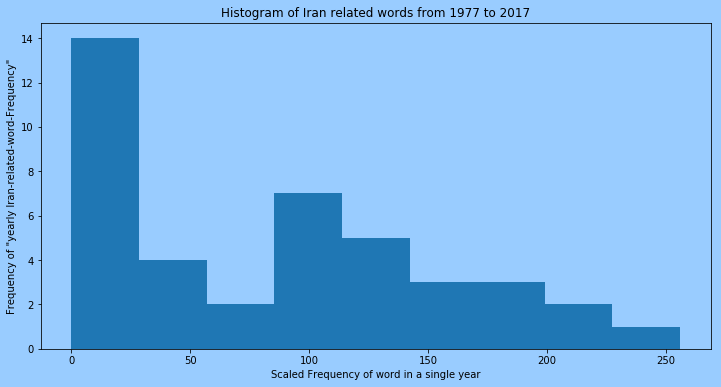

In [323]:
import matplotlib.pyplot as plt
plt.hist(yearly_frequency.iran  , bins= 9)
plt.rcParams["figure.figsize"] = [12,6]
plt.title('Histogram of Iran related words from 1977 to 2017')
plt.xlabel('Scaled Frequency of word in a single year')
plt.ylabel('Frequency of "yearly Iran-related-word-Frequency"')
plt.show()
plt.close()

In [360]:
xlabels = ['Iran Revolotion', 'Iran-Iraq war starts', 'Iran-Iraq war ends', 'Rafsanjani Presedency Starts','Invasion of Kuwait by Iraq', 
            'Khatami Presendency Starts', 'Ahmadi-N Presendency Starts','Syria War starts', 'Iran-USA nuclear deal', 'Mina stampede']
xvalues = [1978, 1980, 1988, 1989, 1990, 1997, 2005,  2011, 2015.3, 2014.7]

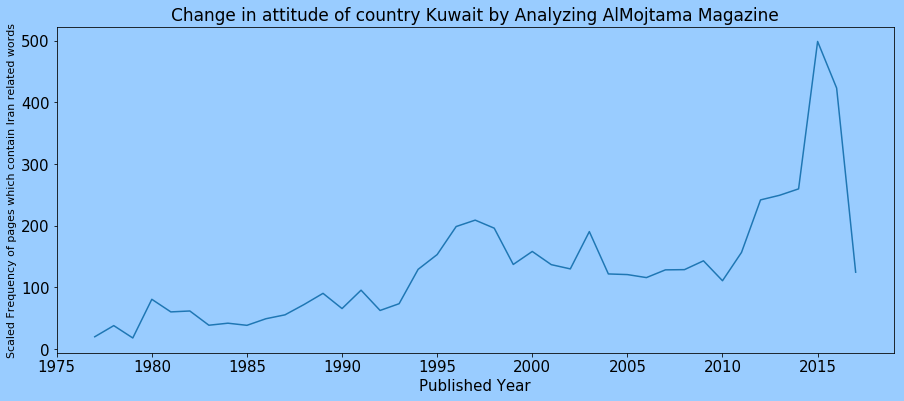

In [361]:
plt.plot(yearly_frequency.year, yearly_frequency.iran_related_fraction )
#plt.xticks(xvalues, xlabels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.title('Change in attitude of country Kuwait by Analyzing AlMojtama Magazine', fontsize = 17)
plt.xlabel('Published Year', fontsize = 15)
plt.ylabel('Scaled Frequency of pages which contain Iran related words',  fontsize = 11)
plt.show()
plt.close()

In [362]:
# creating two additional columns for presentaion in scatter plot
s = np.array( yearly_frequency.negative_fraction)
first_threshold = np.percentile(s, 33)
second_threshold =np.percentile(s, 60)
def getColor(attitide):
    if attitide < first_threshold:
        return 'green'
    elif (attitide >= first_threshold) and (attitide <= second_threshold):
        return 'white'
    else:
        return 'red'

first_collection_mean = yearly_frequency.negative_fraction[yearly_frequency.negative_fraction < first_threshold].mean()
second_collection_mean = yearly_frequency.negative_fraction[(yearly_frequency.negative_fraction >= first_threshold) &
                                                           (yearly_frequency.negative_fraction <= second_threshold)].mean()

def rescale(attitide):
    if attitide < first_threshold:
        return attitide
    elif (attitide >= first_threshold) and (attitide <= second_threshold):
        return attitide - first_collection_mean
    else:
        return attitide - second_collection_mean
    

yearly_frequency['attitude_color'] = yearly_frequency.negative_fraction.apply(lambda x: getColor(x))
yearly_frequency['relative_Radius'] = yearly_frequency.negative_fraction.apply(lambda x: rescale(x))

In [363]:
yearly_frequency.head()

,year,alAjam,alJomhouri,alMajoos,fars,iran,total_pages,iran_related_fraction,negative_fraction,attitude_color,relative_Radius
0,1977.0,2.0,0.0,0.0,17.0,0.0,2328,20.020587,2.107430,green,2.107430
1,1978.0,3.0,0.0,0.0,30.0,2.0,2254,38.090820,3.264927,white,1.435434
2,1979.0,3.0,0.0,1.0,10.0,0.0,1902,18.056090,5.158883,red,1.843584
3,1980.0,2.0,1.0,0.0,36.0,32.0,2156,80.782219,2.275555,green,2.275555
4,1981.0,4.0,0.0,0.0,31.0,17.0,2114,60.339894,4.641530,red,1.326231


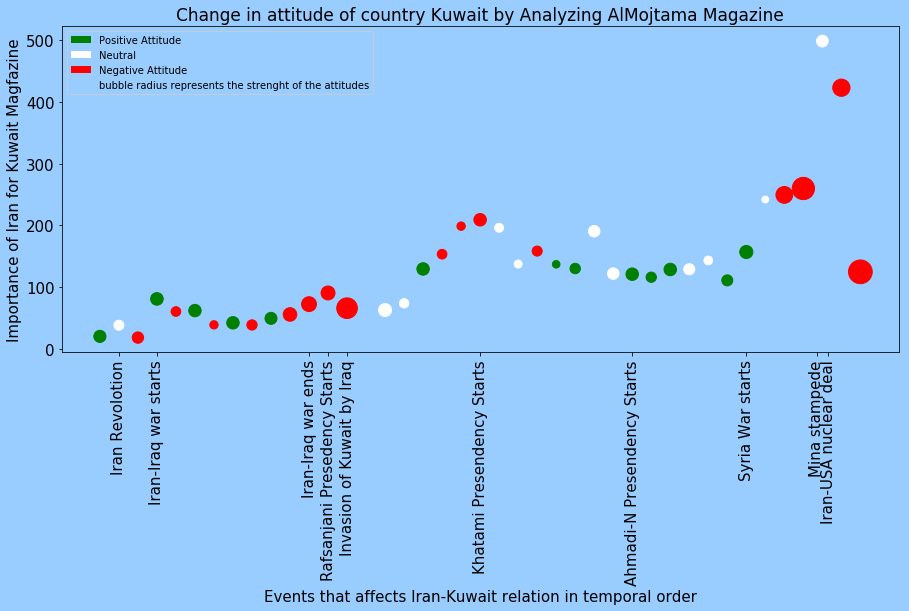

In [369]:
plt.scatter(yearly_frequency.year, yearly_frequency.iran_related_fraction, s = yearly_frequency.relative_Radius * 70, 
            c= yearly_frequency.attitude_color  )

classes = ['Positive Attitude','Neutral','Negative Attitude', 'bubble radius represents the strenght of the attitudes']
class_colours = ['green','white','red', '#99ccff']
circles = []
for i in range(0,len(class_colours)):
    circles.append(mpatches.Circle((200,200) ,1,fc=class_colours[i]))
plt.legend(circles,classes,loc=2, facecolor="#99ccff")
#plt.legend('bubble radius represents the strenght of the attitude',loc=4, facecolor="#99ccff")
plt.title('Change in attitude of country Kuwait by Analyzing AlMojtama Magazine', fontsize = 17)
plt.xlabel('Events that affects Iran-Kuwait relation in temporal order', fontsize = 15)
plt.ylabel('Importance of Iran for Kuwait Magfazine',  fontsize = 15)
plt.xticks(xvalues, xlabels, rotation='vertical')
plt.rcParams["figure.figsize"] = [15,6]
plt.rcParams['figure.facecolor'] = '#99ccff'
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.show()
plt.close()